# ETA

Shape: (21837, 12)

Columns: ['date_hour', 'rides', 'hour', 'weekday', 'lag_1', 'lag_2', 'lag_24', 'is_holiday', 'temp', 'precip', 'year', 'month']

Years in dataset: [2023, 2024, 2025]
Categories (3, int32): [2023, 2024, 2025]

Missing Values:
 date_hour         0
rides             0
hour              0
weekday           0
lag_1             0
lag_2             0
lag_24            0
is_holiday        0
temp          21837
precip        21837
year              0
month             0
dtype: int64

Summary Stats:
                         date_hour         rides          hour       weekday  \
count                       21837  21837.000000  21837.000000  21837.000000   
mean   2024-03-31 23:34:19.898337   4803.481843     11.501305      2.999588   
min           2023-01-02 00:00:00     31.000000      0.000000      0.000000   
25%           2023-08-17 12:00:00   2120.000000      6.000000      1.000000   
50%           2024-04-01 00:00:00   5374.000000     12.000000      3.000000   
75%       

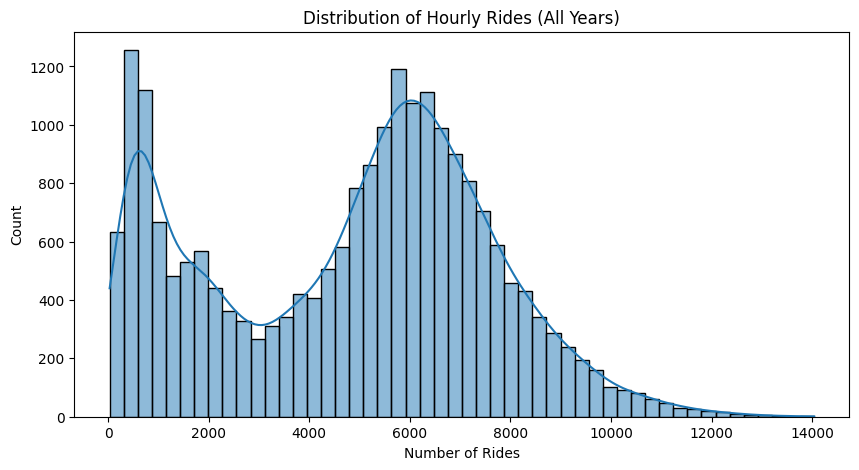

C:\Users\moreda\AppData\Local\Temp\ipykernel_13460\979375026.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_trend = hourly_demand.groupby('year')['rides'].sum().reset_index()


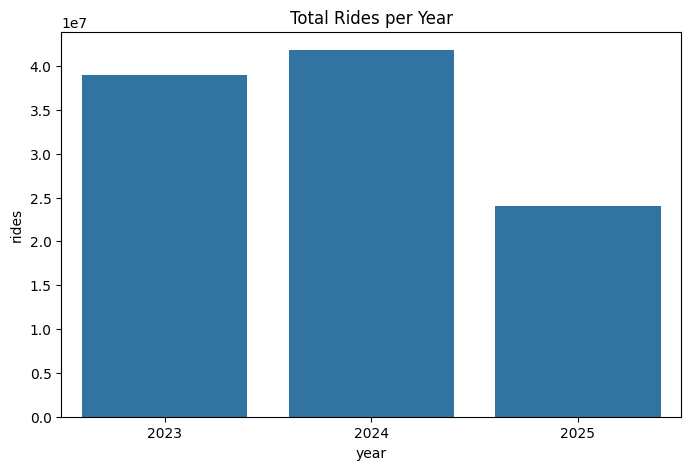

C:\Users\moreda\AppData\Local\Temp\ipykernel_13460\979375026.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trend = hourly_demand.groupby(['year', 'month'])['rides'].sum().reset_index()


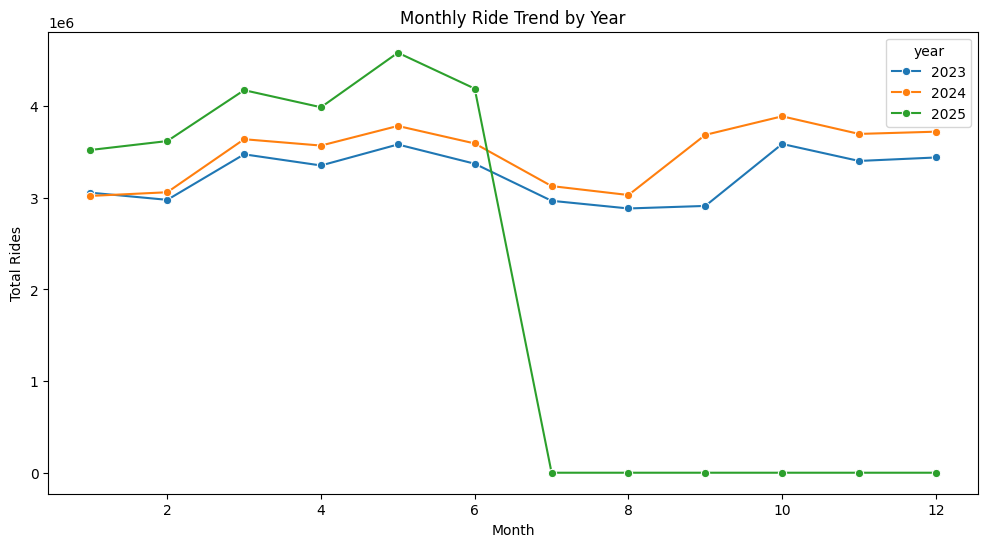

C:\Users\moreda\AppData\Local\Temp\ipykernel_13460\979375026.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hour', y='rides', data=hourly_demand, estimator=sum, ci=None)


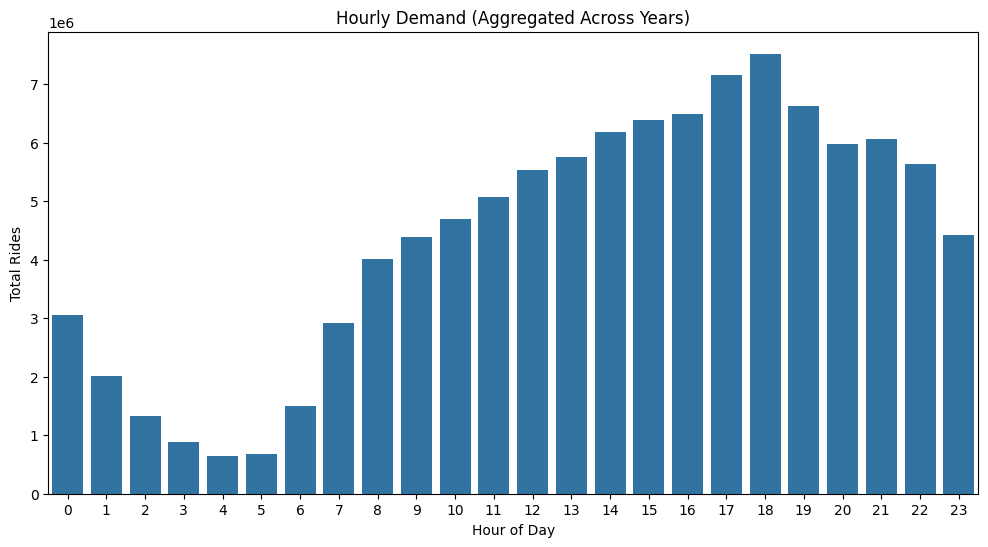

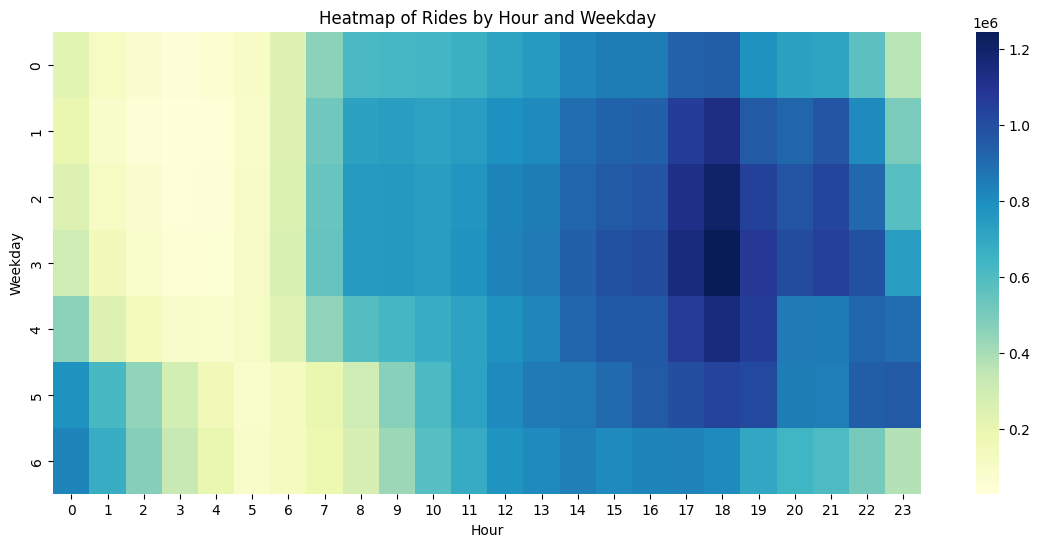

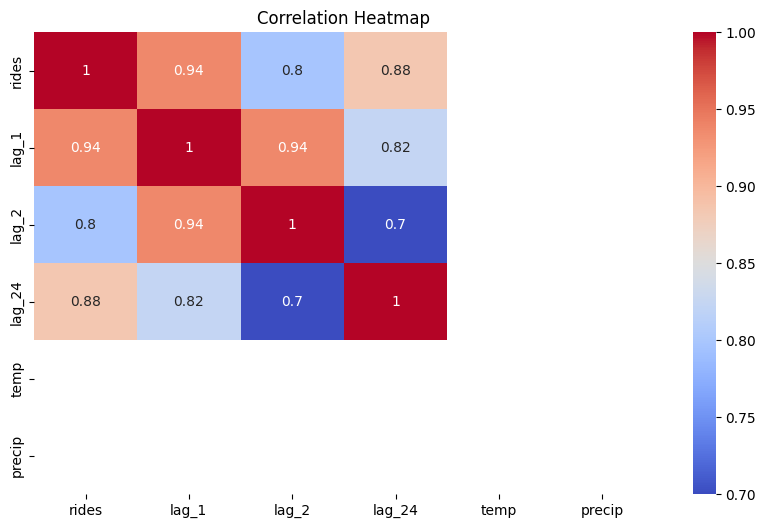

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load partitioned Parquet (multi-year)
hourly_demand = pd.read_parquet("data/hourly_demand_partitioned/final")

# -----------------------------
# 1. Basic Info
# -----------------------------
print("Shape:", hourly_demand.shape)
print("\nColumns:", hourly_demand.columns.tolist())
print("\nYears in dataset:", hourly_demand['year'].unique())
print("\nMissing Values:\n", hourly_demand.isnull().sum())
print("\nSummary Stats:\n", hourly_demand.describe())

# -----------------------------
# 2. Distribution of Hourly Rides
# -----------------------------
plt.figure(figsize=(10, 5))
sns.histplot(hourly_demand['rides'], bins=50, kde=True)
plt.title("Distribution of Hourly Rides (All Years)")
plt.xlabel("Number of Rides")
plt.show()

# -----------------------------
# 3. Yearly Trend
# -----------------------------
yearly_trend = hourly_demand.groupby('year')['rides'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='year', y='rides', data=yearly_trend)
plt.title("Total Rides per Year")
plt.show()

# -----------------------------
# 4. Monthly Trend Across Years
# -----------------------------
monthly_trend = hourly_demand.groupby(['year', 'month'])['rides'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='rides', hue='year', data=monthly_trend, marker="o")
plt.title("Monthly Ride Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.show()

# -----------------------------
# 5. Hourly Demand Pattern
# -----------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='rides', data=hourly_demand, estimator=sum, ci=None)
plt.title("Hourly Demand (Aggregated Across Years)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Rides")
plt.show()

# -----------------------------
# 6. Heatmap: Hour vs Weekday
# -----------------------------
pivot = hourly_demand.pivot_table(values='rides', index='weekday', columns='hour', aggfunc='sum')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title("Heatmap of Rides by Hour and Weekday")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.show()

# -----------------------------
# 7. Correlation Heatmap
# -----------------------------
numeric_cols = ['rides', 'lag_1', 'lag_2', 'lag_24']
if 'temp' in hourly_demand.columns and 'precip' in hourly_demand.columns:
    numeric_cols += ['temp', 'precip']

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_demand[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

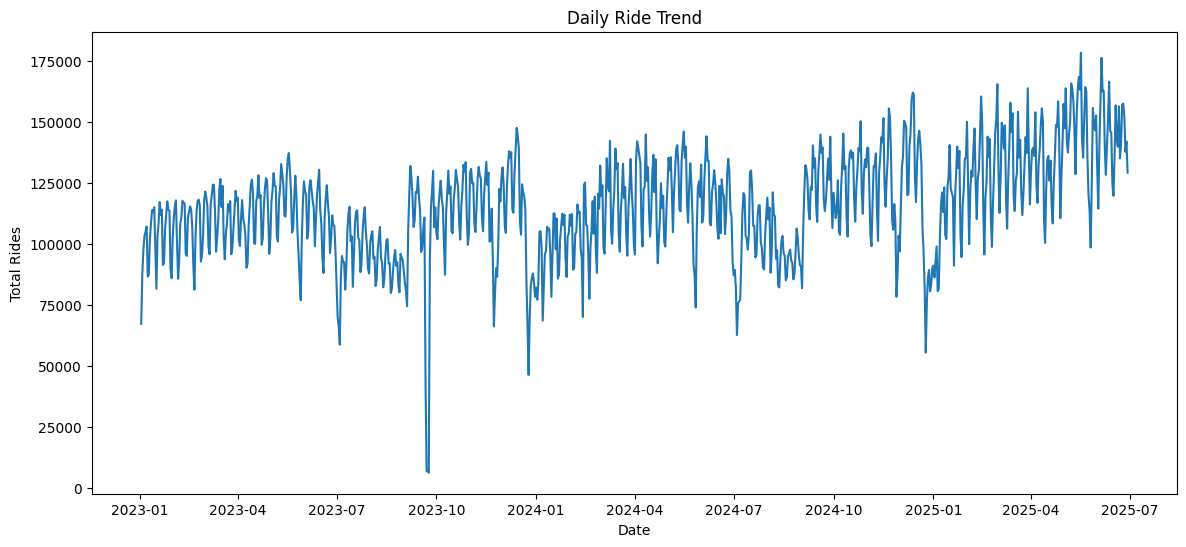

In [2]:
# -----------------------------
# 4. Daily Trend
# -----------------------------
hourly_demand['date'] = hourly_demand['date_hour'].dt.date
daily_trend = hourly_demand.groupby('date')['rides'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='rides', data=daily_trend)
plt.title("Daily Ride Trend")
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.show()
